In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'Выпрыгивания_10_сек': [8, 9, 16, 15, 15, 17, 16, 18],
    'Отжимания': [20, 20, 25, 40, 35, 30, 29, 27],
    'Сила_удара': [250, 300, 500, 600, 630, 620, 480, 550]
}
df = pd.DataFrame(data)
df

,Выпрыгивания_10_сек,Отжимания,Сила_удара
0,8,20,250
1,9,20,300
2,16,25,500
3,15,40,600
4,15,35,630
5,17,30,620
6,16,29,480
7,18,27,550


Одномерная интерполяция — это область построения кривой, которая бы полностью соответствовала набору двумерных точек данных. В SciPy есть функция interp1d, которая используется для создания одномерной интерполяции. При подборе гиперпараметров можно выбрать закон по которому будет происходить интерполяция, по умолчанию он линейный, но также доступно использования квадратичной и кубической зависимостей (quadratic, cubic, linear) .

The kind parameter specifies the type of curve you want. This parameter can be quadratic, cubic, or any other type but the default is linear.

<Figure size 432x288 with 0 Axes>

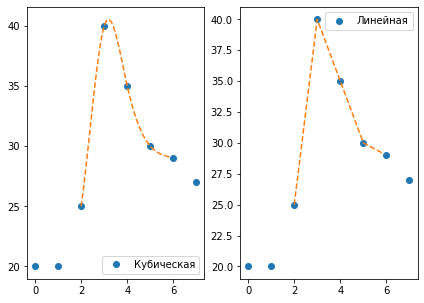

In [3]:
from scipy import interpolate
x = np.arange(0, 8)
y = df['Отжимания']
f = interpolate.interp1d(x, y, kind = 'cubic')
f1 = interpolate.interp1d(x, y, kind = 'linear')
x1 = np.arange(2, 6, 0.1)

y1 = f(x1)   # использовать функцию интерполяции, возвращаемую `interp1d`
y2 = f1(x1)

plt.figure()
fig = plt.figure(figsize =(7, 5))

# addind first subplot
plt.subplot(121)
plt.plot(x, y, 'o', x1, y1, '--')
plt.legend(["Кубическая"])

# addding second subplot
plt.subplot(122)
plt.plot(x, y, 'o', x1, y2, '--')
plt.legend(["Линейная"])

С помощью SciPy так же можно получать описательные статистики

In [12]:
from scipy import stats
x = df
pd.DataFrame({"Максимум": x.max(),"Минимум":x.min(), 
      "Ср.арифмет": x.mean(), "Дисперсия": 
      x.var()})

,Максимум,Минимум,Ср.арифмет,Дисперсия
Выпрыгивания_10_сек,18,8,14.25,13.642857
Отжимания,40,20,28.25,47.928571
Сила_удара,630,250,491.25,20869.642857


# Критерий Стьюдента

ttest_1samp вычисляет t-тест для среднего значения ОДНОЙ группы. Это двусторонний тест для нулевой гипотезы о том, что ожидаемое значение (среднее) выборки независимых наблюдений равно заданному среднему значению для генеральной совокупности, среднему значению.

In [15]:
stats.ttest_1samp(x,x.mean()+1.5)

Ttest_1sampResult(statistic=Выпрыгивания_10_сек   -1.148639
Отжимания             -0.612829
Сила_удара            -0.029368
dtype: float64, pvalue=array([0.28843659, 0.55936503, 0.97739063]))

t-test (Для двух несвязанных выборок).
тест показывает, имеют ли две выборки данных разные средние значения (Теперь у нас две разные выборки, а не одна). Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние

In [18]:
stats.ttest_ind(df.loc[: 4],df.loc[4: ])

Ttest_indResult(statistic=array([-1.95034831, -0.46465181, -1.2268099 ]), pvalue=array([0.09212027, 0.65628726, 0.25955223]))

t-тест для ДВУХ СВЯЗАННЫХ выборок. Это проверка нулевой гипотезы о том, что две связанные или повторяющиеся выборки имеют одинаковые средние (ожидаемые) значения.

In [24]:
stats.ttest_rel(df.loc[: 3],df.loc[4: ])

Ttest_relResult(statistic=array([-2.43450801, -0.65611986, -1.40649763]), pvalue=array([0.09295484, 0.55857961, 0.25426636]))

Параметрические критерии – критерии, основанные на оценке параметров распределения, к которым относятся среднее арифметическое, среднеквадратическое отклонение, дисперсия. Они  применимы только в том случае, если численные данные подчиняются нормальному распределению. Если распределение отличается от нормального, то следует пользоваться так называемыми непараметрическими критериями. В основе проверки на “нормальность” лежит проверка гипотез. Нулевая гипотеза – данные распределены нормально, альтернативная гипотеза – данные не имеют нормального распределения.

Критерий Шапиро-Уилка используется для проверки гипотезы H_0: «случайная величина X распределена нормально» и является одним наиболее эффективных критериев проверки нормальности. Критерии, проверяющие нормальность выборки, являются частным случаем критериев согласия. Если выборка нормальна, можно далее применять мощные параметрические критерии

In [30]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro( df['Выпрыгивания_10_сек']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, looks Gaussian (fail to reject H0)')
else:
    print('Отклонить гипотезу о нормальности, does not look Gaussian (reject H0)')

Statistics=0.813, p-value=0.040
Отклонить гипотезу о нормальности, does not look Gaussian (reject H0)


Критерий К-квадрата Д'Агостино. Этот тест сочетает в себе тест на перекос и тест на эксцесс для проверки нормальности. Перекос — это значение, которое говорит нам, насколько распределение сосредоточено влево или вправо. Другими словами, это мера асимметрии распределения. Эксцесс похож на перекос, но отличается тем, что он говорит нам, какая часть распределения сосредоточена в хвосте. Объединяя эти две метрики, критерий Д'Агостино К-квадрат призван обеспечить большую надежность. 

In [32]:
# D'Agostino and Pearson's Test
# Критерий согласия Пирсона, Тест д'Агостино на K ^ 2
stat, p = scipy.stats.normaltest( df['Отжимания']) 
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.368, p-value=0.832
Принять гипотезу о нормальности


В случае если гипотеза о нормальности отклонена , необходимо воспользоваться непараметрическими критериями. Эти тесты работают аналогичным образом, но требуют, чтобы реальные оценочные данные были сначала преобразованы в ранговые данные, прежде чем можно будет выполнить тест.

**U-тест Манна-Уитни**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html 


Простой непараметрический критерий. Мощность критерия выше, чем у Q-критерия Розенбаума.U-критерий Манна-Уитни используется для оценки различий между двумя независимыми выборками по уровню какого-либо количественного признака.

Этот метод определяет, достаточно ли мала зона перекрещивающихся значений между двумя рядами (ранжированным рядом значений параметра в первой выборке и таким же во второй выборке). Чем меньше значение критерия, тем вероятнее, что различия между значениями параметра в выборках достоверны.

**Ограничения применимости критерия**

В каждой из выборок должно быть не менее 3 значений признака. Допускается, чтобы в одной выборке было два значения, но во второй тогда не менее пяти.
В выборочных данных не должно быть совпадающих значений (все числа — разные) или таких совпадений должно быть очень мало (до 10)

In [34]:
# Mann-Whitney U test

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df['Выпрыгивания_10_сек'],df['Сила_удара'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=0.000, p=0.001
Different distribution (reject H0)


**Критерий Уилкоксона для связанных выборок** (также используются названия Т-критерий Уилкоксона, критерий Вилкоксона, критерий знаковых рангов Уилкоксона, критерий суммы рангов Уилкоксона) – непараметрический статистический критерий, используемый для сравнения двух связанных (парных) выборок по уровню какого-либо количественного признака, измеренного в непрерывной или в порядковой шкале.

Суть метода состоит в том, что сопоставляются абсолютные величины выраженности сдвигов в том или ином направлении. Для этого сначала все абсолютные величины сдвигов ранжируются, а потом суммируются ранги. Если сдвиги в ту или иную сторону происходят случайно, то и суммы их рангов окажутся примерно равны. Если же интенсивность сдвигов в одну сторону больше, то сумма рангов абсолютных значений сдвигов в противоположную сторону будет значительно ниже, чем это могло бы быть при случайных изменениях.

Т-критерий Уилкоксона используется для оценки различий между двумя рядами измерений, выполненных для одной и той же совокупности исследуемых, но в разных условиях или в разное время. Данный тест способен выявить направленность и выраженность изменений - то есть, являются ли показатели больше сдвинутыми в одном направлении, чем в другом.

Классическим примером ситуации, в которой может применяться Т-критерий Уилкоксона для связанных совокупностей, является исследование "до-после", когда сравниваются показатели до и после лечения. Например, при изучении эффективности антигипертензивного средства сравнивается артериальное давление до приема препарата и после приема.

**Условия и ограничения** применения Т-критерия Уилкоксона
Критерий Уилкоксона является непараметрическим критерием, поэтому, в отличие от парного t-критерия Стьюдента, не требует наличия нормального распределения сравниваемых совокупностей.

Число исследуемых при использовании T-критерия Уилкоксона должно быть не менее 
Изучаемый признак может быть измерен как в количественной непрерывной (артериальное давление, ЧСС, содержание лейкоцитов в 1 мл крови), так и в порядковой шкале (число баллов, степень тяжести заболевания, степень обсемененности микроорганизмами).
Данный критерий используется только в случае сравнения двух рядов измерений. Аналогом Т-критерия Уилкоксона для сравнения трех и более связанных совокупностей является Критерий Фридмана.

In [36]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(df['Отжимания'],df['Сила_удара'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=0.000, p=0.008
Different distribution (reject H0)


**Критерий Краскела — Уоллиса** предназначен для проверки равенства медиан нескольких выборок. Данный критерий является многомерным обобщением критерия Уилкоксона — Манна — Уитни. Критерий Краскела — Уоллиса является ранговым, поэтому он инвариантен по отношению к любому монотонному преобразованию шкалы измерения.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

Известен также под названиями: H-критерий Краскела — Уоллиса, однофакторный дисперсионный анализ Краскела — Уоллиса (англ. Kruskal — Wallis one-way analysis of variance)

Примеры задач
Проходит чемпионат мира. Первая выборка — опрос болельщиков с вопросом «Каковы шансы на победу сборной России?» до начала чемпионата. Вторая выборка —- после первой игры, третья — после второго матча и т. д. Значения в выборках — шансы России на победу по десятибалльной шкале (1 —- «никаких перспектив», 10 — «отвезти в Россию кубок —- дело времени»). Требуется проверить, зависят ли результаты опросов от хода чемпионата.

In [38]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal


# compare samples
stat, p = kruskal(df['Выпрыгивания_10_сек'],df['Отжимания'],df['Сила_удара'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=20.507, p=0.000
Different distributions (reject H0)


**Критерий Фридман**а (англ. Friedman test) — непараметрический статистический тест, разработанный американским экономистом Милтоном Фридманом. Является обобщением критерия Уилкоксона и применяется для сопоставления **c** условий измерения (${\displaystyle c\geqslant 3}$) для **n** объектов (испытуемых) с ранжированием по индивидуальным значениям измерений. Непараметрический аналог дисперсионного анализа с повторными измерениями ANOVA. 

Он позволяет проверять гипотезы о различии более чем двух (т.е. от 3-х и до 100) повторных измерений по уровню выраженности изучаемой переменной.

Критерий более эффективен, чем дисперсионный анализ в случае малых выборок (до 30 объектов в выборке) и распределений, отличных от нормального. Он основан на ранжировании повторных измерений для каждого объекта выборки. Проверяется при помощи критерия хи-квадрат ( ).  При справедливости нулевой гипотезы значения статистики Фридмана (критерия Фридмана) малы, т.е. эмпирический критерий меньше, чем критический. И это означает, что различия случайны и недостоверны.

Критерий Фридмана позволяет установить, что величины показателей от условия к условию изменяются, но при этом не указывает на направление изменений и в этом смысле он похож на критерий знаков.

Критерий Фридмана является обобщением критерия Вилкоксона на большее, чем два, количество условий измерения, при этом ранжируются не абсолютные величины сдвигов, а сами индивидуальные значения измерений.

Нулевая гипотеза H0 = {между полученными в разных условиях показателями (т.е. между проверяемыми выборками) существуют лишь случайные различия}.

Альтернативная гипотеза H1 = {между полученными в разных условиях показателями (т.е. между проверяемыми выборками)  имеются существенные неслучайные различия}.

Ранжируются индивидуальные значения показателей (повторные измерения) для каждого экземпляра выборки в порядке убывания признака (ранжирование параметров каждой строки).

In [39]:
# Friedman test

from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(df['Выпрыгивания_10_сек'],df['Отжимания'],df['Сила_удара'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=16.000, p=0.000
Different distributions (reject H0)
